In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

# Results - Shortest Path

In [2]:
main_root = os.getcwd()

In [3]:
root = main_root + '\\GeneSets\\PathLengthsTransferredPPI\\Results'

In [4]:
samples = len(os.listdir(root))

In [5]:
result_example = root + '\\Length_0\\model_gset_length01\\all\\f1.tab'

with open(result_example, 'r') as result:
    antibiotics = []
    for line in result:
        antibiotics.append(line.split('\t')[0])

In [6]:
for i in range(4):
    samples = len(os.listdir(root + f'\\Length_{i}'))
    globals()[f'results_{i}'] = pd.DataFrame(index = antibiotics, columns = range(samples))
    
    for j in range(samples):
        result_file = root + f'\\Length_{i}\\model_gset_length{i}{j+1}\\all\\f1.tab'
        with open(result_file, 'r') as result:
            for line in result:
                values = line.split('\t')
                globals()[f'results_{i}'].loc[values[0]][j] = np.around(float(values[1]), decimals = 3)

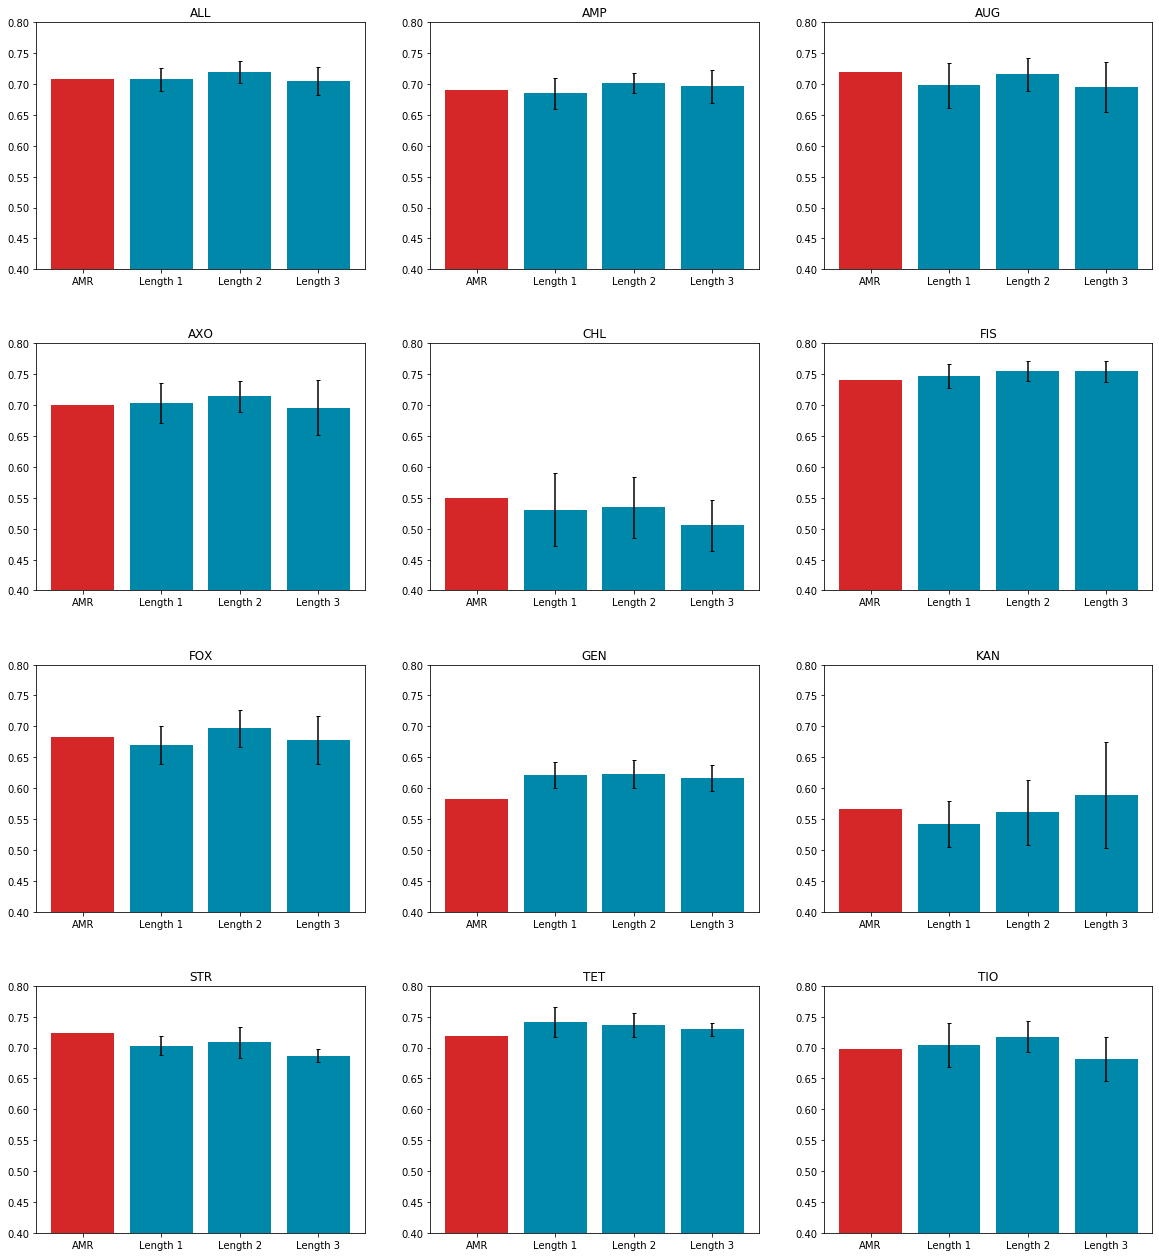

In [8]:
figure, axis = plt.subplots(nrows=4, ncols=3, figsize=(20, 17))


for row in range(4):
    for col in range(3):
        axis[row, col].bar(0, results_0.iloc[3*row+col], color = 'tab:red')
    
for j in range(1,4):
    results_mean = globals()[f'results_{j}'].mean(axis = 1)
    results_std = globals()[f'results_{j}'].std(axis = 1)
    for row in range(4):
        for col in range(3):
            val = results_mean.iloc[3*row+col]
            err = results_std.iloc[3*row+col]
            axis[row, col].bar(j, val, yerr = err, ecolor = 'k', width = 0.8, capsize=2, align = 'center', color = '#0088aa')
        
for row in range(4):
    for col in range(3):
        axis[row, col].set_title(antibiotics[3*row+col])
        axis[row, col].set_ylim([0.4, 0.8])
        axis[row, col].set_xticks([0, 1, 2, 3])
        axis[row, col].set_xticklabels(['AMR', 'Length 1', 'Length 2', 'Length 3'])
        
plt.subplots_adjust(top = 0.999, bottom=0.01, hspace=0.3, wspace=0.2)

In [44]:
results_0[0].values

array([0.721, 0.702, 0.713, 0.719, 0.54, 0.759, 0.684, 0.612, 0.587,
       0.761, 0.73, 0.732], dtype=object)